#Q1

##doing classification without activation function:

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt

 #define Muculloch pittis
class McCulloch_Pitts_neuron():
  def __init__(self, weights , threshold):
    self.weights = weights
    self.threshold = threshold

  def model(self, X ):
    if ((self.weights @ X)  + self.threshold) >= 0 :
      return 1
    else :
      return 0

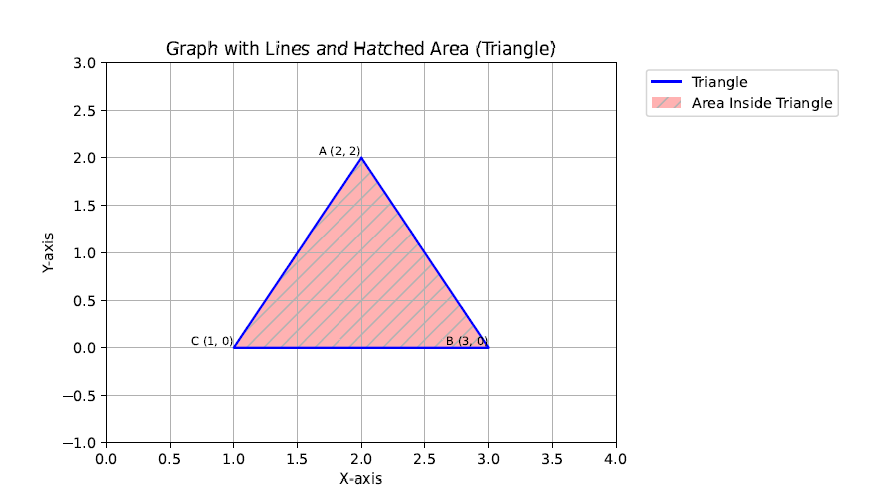

In [ ]:
#define model for dataset
def Triangle(x,y):
  #The equation of the lines of the triangle
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6 )
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2 )
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0 )
  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3 )

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

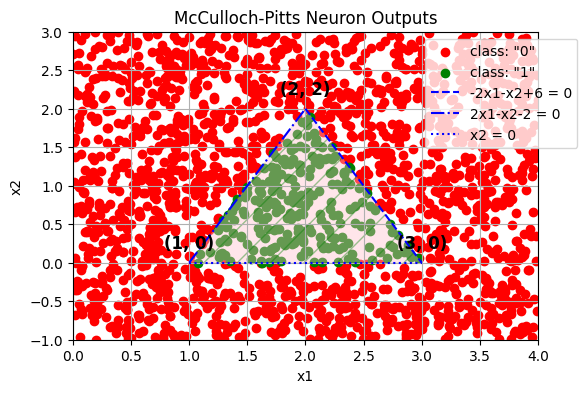

In [ ]:
num_point = 2000
x_val = np.random.uniform( 0 , 4 , num_point )      #x_asis
y_val = np.random.uniform( -1 , 3 , num_point )     #y_asis

red_point = []                  # outside zone
green_point = []                #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 12)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)


# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.0))

plt.show()

## check the effect of adding different activation functions:

###classification with sigmoid as activation function

In [ ]:
tol = 0.0001

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

In [ ]:
# Define sigmoid and ReLU functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

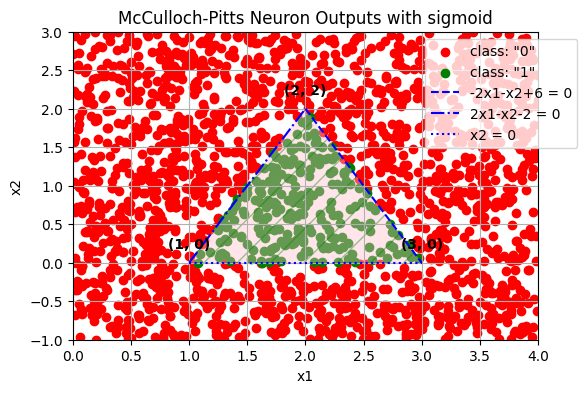

In [ ]:
def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(sigmoid)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(sigmoid)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(sigmoid)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])

#-----------------------------------------------------------
red_point = []      # outside zone
green_point = []    #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag < [0.5] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs with sigmoid')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 10)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--', label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')
# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

plt.show()

###classification with RELU as activation function

In [ ]:
class McCulloch_Pitts_neuron:
    def __init__(self, weights, threshold):
        self.weights = np.array(weights)
        self.threshold = threshold

    def model(self, X):
        X = np.array(X)
        linear_output = self.weights @ X + self.threshold
        return self.activation(linear_output)

    def activation(self, linear_output):
        # Default to the original threshold logic without an activation function
        return 1 if linear_output >= 0 else 0

    def set_activation_function(self, activation_func):
        self.activation = activation_func

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

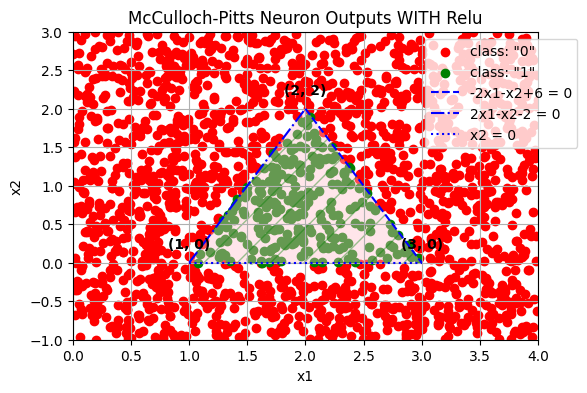

In [ ]:
tol = 0.0001

def Triangle(x,y):
  neur1 = McCulloch_Pitts_neuron([-2 , -1] ,  6+tol )
  # Set activation functions
  # neur1.set_activation_function(relu)
  neur2 = McCulloch_Pitts_neuron([+2 , -1] , -2+tol )
  # neur2.set_activation_function(relu)
  neur3 = McCulloch_Pitts_neuron([ 0 , +1] ,  0+tol )
  # neur3.set_activation_function(relu)

  neur4 = McCulloch_Pitts_neuron([1 , 1 , 1] , -3+tol )
  neur4.set_activation_function(relu)

  zone1 = neur1.model(np.array([x,y]))
  zone2 = neur2.model(np.array([x,y]))
  zone3 = neur3.model(np.array([x,y]))
  zone4 = neur4.model(np.array([zone1 , zone2 , zone3]))

  return list([zone4])
#-------------------------------------------------------------

red_point = [] # outside zone
green_point = [] #  inside zone

for i in range(num_point):
  flag = Triangle(x_val[i] , y_val[i])
  if flag == [0] :
    red_point.append((x_val[i] , y_val[i]))
  else:
    green_point.append((x_val[i] , y_val[i]))


# Separate x and y values for red and green points
red_x, red_y = zip(*red_point)
green_x, green_y = zip(*green_point)

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(red_x, red_y, color='red', label='class: "0"')
plt.scatter(green_x, green_y, color='green', label='class: "1"')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('McCulloch-Pitts Neuron Outputs WITH Relu')
plt.grid(True)

# Annotating the vertices
triangle_vertices = [(2, 2), (3, 0), (1, 0)]
for x, y in triangle_vertices:
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold', fontsize = 10)

x_l1 = [2,3]
y_l1 = [2,0]
x_l2 = [1,2]
y_l2 = [0,2]
x_l3 = [1,3]
y_l3 = [0,0]
# Plotting lines with legends
plt.plot(x_l1 , y_l1 , color='blue', linestyle='--' , label='-2x1-x2+6 = 0')
plt.plot(x_l2 , y_l2 , color='blue', linestyle='-.' , label='2x1-x2-2 = 0')
plt.plot(x_l3 , y_l3 , color='blue', linestyle=':' , label='x2 = 0')

# Extracting x and y coordinates
triangle_x = [v[0] for v in triangle_vertices]
triangle_y = [v[1] for v in triangle_vertices]

# Adding the first vertex at the end to close the polygon
triangle_x.append(triangle_vertices[0][0])
triangle_y.append(triangle_vertices[0][1])

# Filling the triangle with hatching
plt.fill(triangle_x, triangle_y, facecolor='pink', edgecolor='green',  fill=True, hatch='/', linewidth=0.1, alpha=0.4)

# Set axis limits
plt.xlim(0, 4)
plt.ylim(-1, 3)

# Position the legends at the top and right
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))
plt.show()